<a href="https://colab.research.google.com/github/TahaAlamin/MNIST_CorrNoise/blob/main/Project__2_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definitions

In [1]:
%matplotlib inline
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adadelta, Adam, SGD
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AveragePooling2D, Conv2DTranspose, UpSampling2D
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.layers import LeakyReLU

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
os.chdir("/content/gdrive/My Drive/Colab Notebooks") # might have to change path to point to your Colab Notebooks folder

Mounted at /content/gdrive


## Load and format data

Number of classes: 10
Example of handwritten digit with correlated noise: 



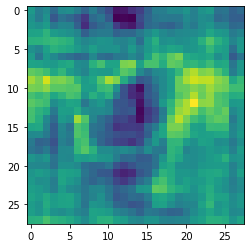

Class: 9

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)


In [2]:
data = np.load('./MNIST_CorrNoise.npz')

x_train = data['x_train']
y_train = data['y_train']

num_cls = len(np.unique(y_train))
print('Number of classes: ' + str(num_cls))

print('Example of handwritten digit with correlated noise: \n')

k = 3000
plt.imshow(np.squeeze(x_train[k,:,:]))
plt.show()
print('Class: '+str(y_train[k])+'\n')

# RESHAPE and standarize
x_train = np.expand_dims(x_train/255,axis=3)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_cls)

print('Shape of x_train: '+str(x_train.shape))
print('Shape of y_train: '+str(y_train.shape))

## Training

In [3]:
model_name='CNN' # To compare models, you can give them different names

pweight='./weights/weights_' + model_name  + '.hdf5'

if not os.path.exists('./weights'):
  os.mkdir('./weights')

## EXPLORE VALUES AND FIND A GOOD SET
b_size =100 # batch size
val_split = 0.3 # percentage of samples used for validation (e.g. 0.5)
ep =20 # number of epochs

In [4]:
input_shape = x_train.shape[1:4] #(28,28,1)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(input_shape = (28, 28, 1),
                                                           kernel_size= 3,padding="same",
                                                           filters= 32,
                                                           strides= 1,                                                           
                                                           activation= 'relu',
                                                           kernel_initializer= 'VarianceScaling'),
                                    tf.keras.layers.Conv2D(kernel_size=3, filters=32, activation= 'relu'),                                    
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
                                    #tf.keras.layers.Conv2D(kernel_size=5, filters=32,strides=2,padding='same',activation= 'relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Conv2D(kernel_size= 3,padding="same",
                                                           filters=64,strides= 1,
                                                           activation= 'relu',
                                                           kernel_initializer= 'GlorotUniform'),                                    
                                    tf.keras.layers.Conv2D(kernel_size=3, filters=64, activation= 'relu'),                                                                      
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2, padding='valid'),
                                    #tf.keras.layers.Conv2D(kernel_size=5, filters=64,strides=2,padding='same',activation= 'relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units= 256,kernel_initializer= 'GlorotUniform',
                                                          activation= 'relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(units= 10,kernel_initializer= 'GlorotUniform',
                                                          activation= 'softmax')
                                    ])

model.compile(loss=categorical_crossentropy,
              optimizer= "adamax",metrics=['accuracy'])#, # explore other optimizers:Adadelta() Adam, SGD

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        1

Epoch 1/20
416/420 [============================>.] - ETA: 0s - loss: 1.5811 - accuracy: 0.4477
Epoch 00001: val_loss improved from inf to 1.19370, saving model to ./weights/weights_CNN.hdf5
420/420 [==============================] - 4s 9ms/step - loss: 1.5757 - accuracy: 0.4497 - val_loss: 1.1937 - val_accuracy: 0.5898
Epoch 2/20
419/420 [============================>.] - ETA: 0s - loss: 0.7996 - accuracy: 0.7326
Epoch 00002: val_loss improved from 1.19370 to 0.51464, saving model to ./weights/weights_CNN.hdf5
420/420 [==============================] - 3s 8ms/step - loss: 0.7995 - accuracy: 0.7326 - val_loss: 0.5146 - val_accuracy: 0.8325
Epoch 3/20
416/420 [============================>.] - ETA: 0s - loss: 0.6113 - accuracy: 0.7985
Epoch 00003: val_loss improved from 0.51464 to 0.42858, saving model to ./weights/weights_CNN.hdf5
420/420 [==============================] - 3s 8ms/step - loss: 0.6107 - accuracy: 0.7988 - val_loss: 0.4286 - val_accuracy: 0.8588
Epoch 4/20
419/420 [======

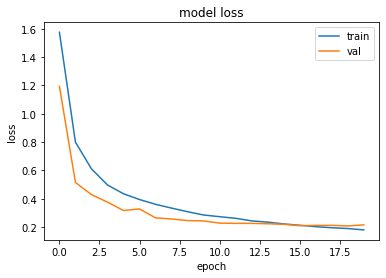

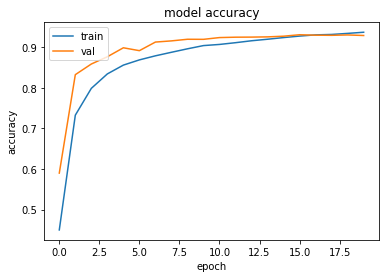

In [5]:

# GlorotUniform
## EXPLORE LAYERS, # CHANNELS... Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AveragePooling2D, Conv2DTranspose, UpSampling2D
## SEE KERAS MANUAL https://keras.io/layers/about-keras-layers/
#model.add(Conv2D(1, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) # explore num channels and adding more layers
#model.add(Flatten()) # transforms matrix feature map to vector for dense layer (fully connected)
##
#model.add(Dense(num_cls, activation='softmax')) # This is a necessary output layer, however, you can add more dense layers before with different activation functions


checkpointer = ModelCheckpoint(filepath=pweight, verbose=1, save_best_only=True)
callbacks_list = [checkpointer] # explore adding other callbacks such as ReduceLROnPlateau, EarlyStopping

history=model.fit(x_train, y_train,
                        epochs=ep,
                        batch_size=b_size,
                        verbose=1,
                        shuffle=True,
                        validation_split = val_split,
                        callbacks=callbacks_list)

print('CNN weights saved in ' + pweight)

# Plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Make predictions in test set

In [6]:
from keras.models import load_model

## LOAD DATA
data = np.load('./MNIST_CorrNoise.npz')

x_test = data['x_test']
y_test = data['y_test']

num_cls = len(np.unique(y_test))
print('Number of classes: ' + str(num_cls))

# RESHAPE and standarize
x_test = np.expand_dims(x_test/255,axis=3)

print('Shape of x_train: '+str(x_test.shape)+'\n')

## Define model parameters
model_name='CNN' # To compare models, you can give them different names
pweight='./weights/weights_' + model_name  + '.hdf5'

model = load_model(pweight)
y_pred = model.predict_classes(x_test)

Acc_pred = sum(y_pred == y_test)/len(y_test)

print('Accuracy in test set is: '+str(Acc_pred))


Number of classes: 10
Shape of x_train: (10000, 28, 28, 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy in test set is: 0.932
